In [1]:
import tensorflow as tf 
print(tf.__version__)

2.1.0


In [2]:
import numpy as np
import matplotlib.pyplot as plt 
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, GlobalMaxPooling2D, MaxPooling2D,BatchNormalization
from tensorflow.keras.models import Model

In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train/ 255.0, x_test/ 255.0 
x_train.shape

4423680/4422102 [==============================] - 17s 4us/step


(60000, 28, 28)

In [4]:
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
x_train.shape

(60000, 28, 28, 1)

In [9]:
K = len(set(y_train))
K

10

In [7]:
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3,3), strides=2, activation='relu')(i)
x = Conv2D(64, (3,3), strides=2, activation='relu')(x)
x = Conv2D(128, (3,3), strides=2, activation='relu')(x)

x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x) 

model = Model(i, x)

In [8]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 29s 488us/sample - loss: 0.5159 - accuracy: 0.8091 - val_loss: 0.4348 - val_accuracy: 0.8297
Epoch 2/10
60000/60000 [==============================] - 14s 229us/sample - loss: 0.3555 - accuracy: 0.8669 - val_loss: 0.3383 - val_accuracy: 0.8775
Epoch 3/10
60000/60000 [==============================] - 23s 376us/sample - loss: 0.3099 - accuracy: 0.8839 - val_loss: 0.3305 - val_accuracy: 0.8760
Epoch 4/10
60000/60000 [==============================] - 25s 416us/sample - loss: 0.2747 - accuracy: 0.8964 - val_loss: 0.3066 - val_accuracy: 0.8892
Epoch 5/10
60000/60000 [==============================] - 21s 346us/sample - loss: 0.2499 - accuracy: 0.9057 - val_loss: 0.3027 - val_accuracy: 0.8956
Epoch 6/10
60000/60000 [==============================] - 20s 331us/sample - loss: 0.2282 - accuracy: 0.9147 - val_loss: 0.3149 - val_accuracy: 0.8887
Epoch 7/10
60000/60000 [====================

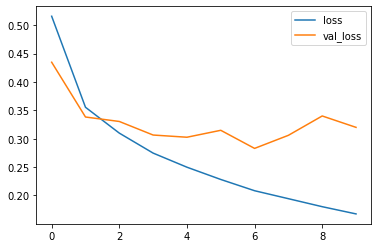

In [9]:
import matplotlib.pyplot as plt 
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

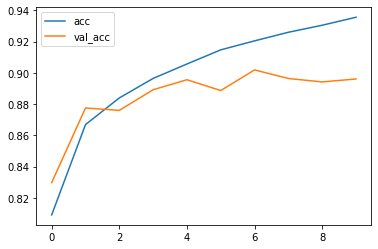

In [10]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [3]:
cifar10 = tf.keras.datasets.cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train/ 255.0, x_test/ 255.0 
x_train.shape

(50000, 32, 32, 3)

In [4]:
y_train, y_test = y_train.flatten(), y_test.flatten()

In [5]:
x_train = x_train[:10000]
y_train = y_train[:10000]
print(x_train.shape)
print(y_train.shape)

(10000, 32, 32, 3)
(10000,)


In [6]:
batch_size = 32
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
train_generator = data_generator.flow(x_train, y_train, batch_size)
steps_per_epoch = x_train.shape[0] // batch_size

In [8]:
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3,3), strides=2, activation='relu')(i)
x = BatchNormalization()(x)

x = Conv2D(32, (3,3), strides=2, activation='relu')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)

x = Conv2D(64, (3,3), strides=2, activation='relu')(x)
x = BatchNormalization()(x)



x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(10, activation='softmax')(x) 

model = Model(i, x)

In [10]:
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])
r = model.fit(train_generator, validation_data=(x_test, y_test), steps_per_epoch=steps_per_epoch, epochs=50)
# r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5)

W0425 15:09:11.650691 139668797355840 data_adapter.py:1091] sample_weight modes were coerced from
  ...
    to  
  ['...']
Train for 312 steps, validate on 10000 samples
Epoch 1/50
312/312 [==============================] - 34s 111ms/step - loss: 1.8325 - accuracy: 0.3219 - val_loss: 2.3449 - val_accuracy: 0.1955
Epoch 2/50
312/312 [==============================] - 14s 44ms/step - loss: 1.6322 - accuracy: 0.3973 - val_loss: 1.6619 - val_accuracy: 0.4153
Epoch 3/50
312/312 [==============================] - 13s 41ms/step - loss: 1.5603 - accuracy: 0.4275 - val_loss: 1.4753 - val_accuracy: 0.4605
Epoch 4/50
312/312 [==============================] - 13s 41ms/step - loss: 1.5088 - accuracy: 0.4513 - val_loss: 1.8466 - val_accuracy: 0.3783
Epoch 5/50
312/312 [==============================] - 13s 42ms/step - loss: 1.4597 - accuracy: 0.4706 - val_loss: 1.3641 - val_accuracy: 0.5065
Epoch 6/50
312/312 [==============================] - 13s 42ms/step - loss: 1.4276 - accuracy: 0.4789 - val_l

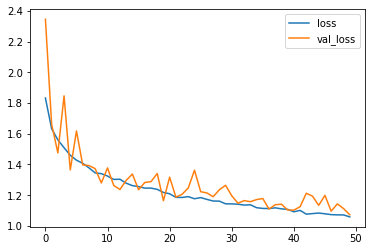

In [11]:
import matplotlib.pyplot as plt 
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()